# Study of Religious Violence with different metrics of Nations

##### In this project we will study how religious violence varies across different nations and how they depend on various metrics such as:
-  features : country_name, literacy rate , education quality index , enployment , economic gap , gdp_per_capita ,corruption index ,  press freedom index , human development index ,government restriction Index, terrorism index, major religion
- labels : social hostilities index


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Datasheet_religious_violence_final.csv")
dataset.head()

,Country,Literacy Rate,Education Index,Employment,Inequality,gdp(pc),corruption index,press freedom index,government restriction index,terrorism index,HDI,Major Faith,Social Hostilities Index
0,Afghanistan,37.30%,0.415,36.71%,NaN,NaN,24.0,39.75,Very High,8.822,0.498,Islam,Very High
1,Albania,98.10%,0.745,52.35%,33.2,"$6,643",36.0,57.86,NaN,0.000,0.785,Islam,NaN
2,Algeria,81.40%,0.664,35.90%,27.6,"$4,274",33.0,45.74,High,4.083,0.754,Islam,High
3,Andorra,100%,0.714,NaN,NaN,NaN,NaN,75.05,NaN,NaN,0.858,Christianity,NaN
4,Angola,71.10%,0.498,69.03%,51.3,"$2,999",33.0,48.30,Moderate,0.158,0.581,Christianity,Moderate


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Literacy Rate                 193 non-null    object 
 2   Education Index               188 non-null    float64
 3   Employment                    180 non-null    object 
 4   Inequality                    161 non-null    float64
 5   gdp(pc)                       189 non-null    object 
 6   corruption index              175 non-null    float64
 7   press freedom index           171 non-null    float64
 8   government restriction index  78 non-null     object 
 9   terrorism index               159 non-null    float64
 10  HDI                           186 non-null    float64
 11  Major Faith                   195 non-null    object 
 12  Social Hostilities Index      79 non-null     object 
dtypes: fl

In [4]:
values = {"government restriction index":"Low","terrorism index":0,"Social Hostilities Index":"Low"}
dataset.fillna(value=values,inplace=True)
#dataset=dataset.dropna().reset_index().drop("index", axis = 1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Literacy Rate                 193 non-null    object 
 2   Education Index               188 non-null    float64
 3   Employment                    180 non-null    object 
 4   Inequality                    161 non-null    float64
 5   gdp(pc)                       189 non-null    object 
 6   corruption index              175 non-null    float64
 7   press freedom index           171 non-null    float64
 8   government restriction index  195 non-null    object 
 9   terrorism index               195 non-null    float64
 10  HDI                           186 non-null    float64
 11  Major Faith                   195 non-null    object 
 12  Social Hostilities Index      195 non-null    object 
dtypes: fl

In [6]:
dataset.head()

,Country,Literacy Rate,Education Index,Employment,Inequality,gdp(pc),corruption index,press freedom index,government restriction index,terrorism index,HDI,Major Faith,Social Hostilities Index
0,Afghanistan,37.30%,0.415,36.71%,NaN,NaN,24.0,39.75,Very High,8.822,0.498,Islam,Very High
1,Albania,98.10%,0.745,52.35%,33.2,"$6,643",36.0,57.86,Low,0.000,0.785,Islam,Low
2,Algeria,81.40%,0.664,35.90%,27.6,"$4,274",33.0,45.74,High,4.083,0.754,Islam,High
3,Andorra,100%,0.714,NaN,NaN,NaN,NaN,75.05,Low,0.000,0.858,Christianity,Low
4,Angola,71.10%,0.498,69.03%,51.3,"$2,999",33.0,48.30,Moderate,0.158,0.581,Christianity,Moderate


In [7]:
# removing the %,$ symbols
dataset["Literacy Rate"]=dataset["Literacy Rate"].str.replace('%','')
dataset["Employment"]=dataset["Employment"].str.replace('%','')
dataset["gdp(pc)"]=dataset["gdp(pc)"].str.replace("$",'')
dataset["gdp(pc)"]=dataset["gdp(pc)"].str.replace(",",'')

C:\Users\Arian\AppData\Local\Temp\ipykernel_18176\419792245.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset["gdp(pc)"]=dataset["gdp(pc)"].str.replace("$",'')


In [8]:
dataset.head()  ## that is done now converting them to floats

,Country,Literacy Rate,Education Index,Employment,Inequality,gdp(pc),corruption index,press freedom index,government restriction index,terrorism index,HDI,Major Faith,Social Hostilities Index
0,Afghanistan,37.30,0.415,36.71,NaN,NaN,24.0,39.75,Very High,8.822,0.498,Islam,Very High
1,Albania,98.10,0.745,52.35,33.2,6643,36.0,57.86,Low,0.000,0.785,Islam,Low
2,Algeria,81.40,0.664,35.90,27.6,4274,33.0,45.74,High,4.083,0.754,Islam,High
3,Andorra,100,0.714,NaN,NaN,NaN,NaN,75.05,Low,0.000,0.858,Christianity,Low
4,Angola,71.10,0.498,69.03,51.3,2999,33.0,48.30,Moderate,0.158,0.581,Christianity,Moderate


In [9]:
dataset["Literacy Rate"]=pd.to_numeric(dataset["Literacy Rate"])
dataset["Employment"]=pd.to_numeric(dataset["Employment"])
dataset["gdp(pc)"]=pd.to_numeric(dataset["gdp(pc)"])

In [10]:
dataset.describe()

,Literacy Rate,Education Index,Employment,Inequality,gdp(pc),corruption index,press freedom index,terrorism index,HDI
count,193.000000,188.000000,180.000000,161.000000,189.000000,175.000000,171.000000,195.000000,186.000000
mean,86.949016,0.650383,56.477717,38.319876,17570.721111,42.760000,58.105497,1.810585,0.705978
std,17.558985,0.172927,11.455690,7.907400,29328.759433,18.361304,17.192803,2.552058,0.151718
min,22.300000,0.214000,22.621000,24.600000,238.000000,12.000000,21.720000,0.000000,0.354000
25%,80.800000,0.512500,49.477500,32.800000,2191.000000,29.500000,45.735000,0.000000,0.589250
50%,95.600000,0.679000,57.159500,36.800000,6571.000000,39.000000,58.120000,0.000000,0.733500
75%,99.000000,0.787750,63.532000,42.800000,20019.000000,55.000000,71.255000,3.476000,0.813750
max,100.000000,0.940000,88.200000,63.000000,234315.000000,90.000000,95.180000,8.822000,0.953000


### Now doing Quartile Analysis, Histogram and Scatter plot


array([[<Axes: title={'center': 'Literacy Rate'}>]], dtype=object)

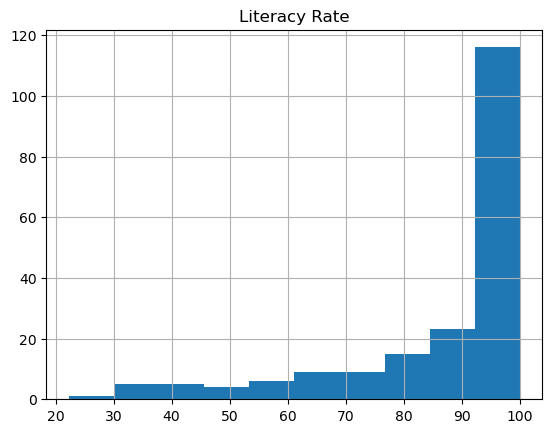

In [11]:
dataset.hist(column=["Literacy Rate"])

array([[<Axes: title={'center': 'Education Index'}>]], dtype=object)

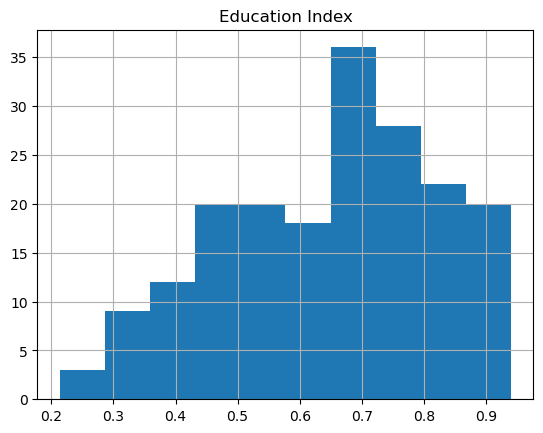

In [12]:
dataset.hist(column=["Education Index"])

array([[<Axes: title={'center': 'Employment'}>]], dtype=object)

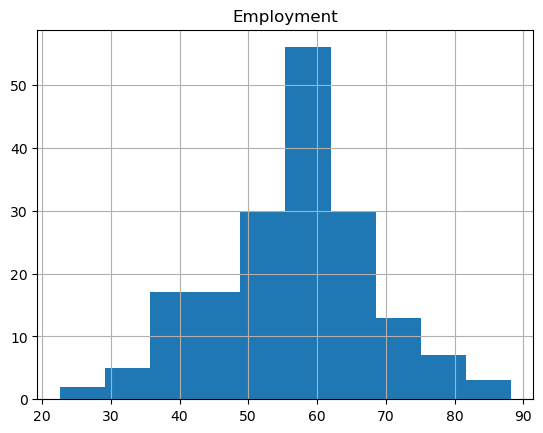

In [13]:
dataset.hist(column=["Employment"])

array([[<Axes: title={'center': 'Inequality'}>]], dtype=object)

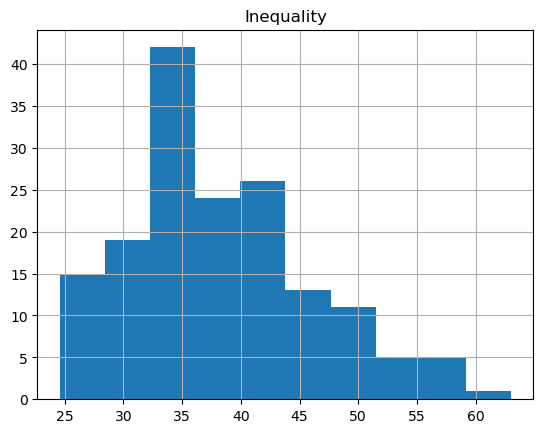

In [14]:
dataset.hist(column=["Inequality"])

array([[<Axes: title={'center': 'gdp(pc)'}>]], dtype=object)

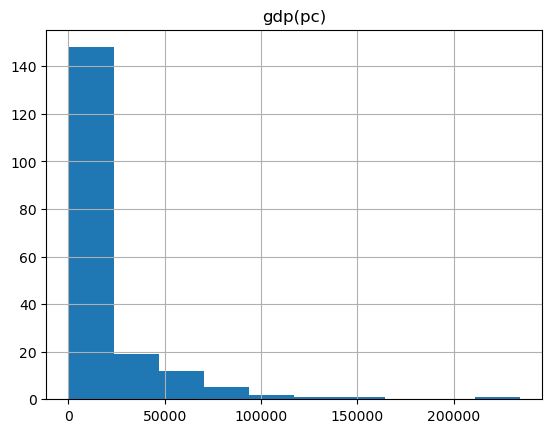

In [15]:
dataset.hist(column=["gdp(pc)"])

array([[<Axes: title={'center': 'corruption index'}>]], dtype=object)

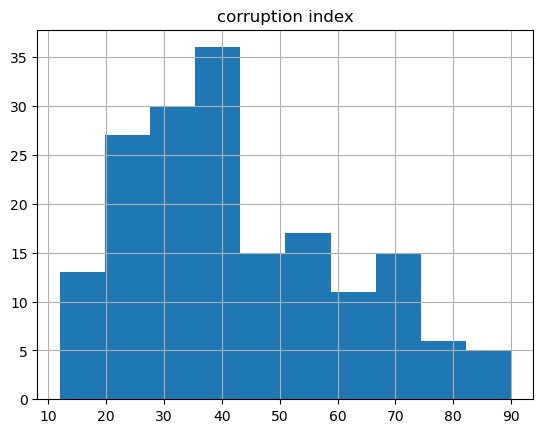

In [16]:
dataset.hist(column=["corruption index"])

array([[<Axes: title={'center': 'press freedom index'}>]], dtype=object)

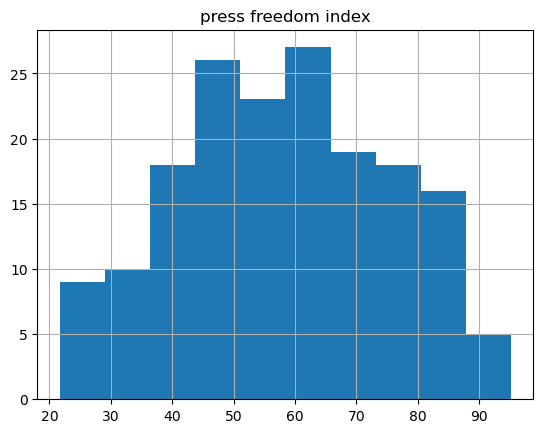

In [17]:
dataset.hist(column=["press freedom index"])

array([[<Axes: title={'center': 'terrorism index'}>]], dtype=object)

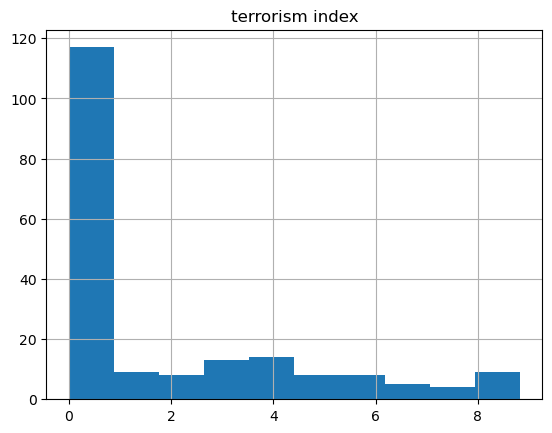

In [18]:
dataset.hist(column=["terrorism index"])

In [19]:
mapping_dictionary_value1={'Very High':4,'High':3,'Moderate':2,'Low':1}
mapping_dictionay_value2={"Christianity":1,"Islam":2,"Buddhism":3,"Hinduism":4,"Judaism":5,"Atheism":6}
dataset["Social Hostilities Index"]=dataset["Social Hostilities Index"].map(mapping_dictionary_value1)
dataset["government restriction index"]=dataset["government restriction index"].map(mapping_dictionary_value1)
dataset["Major Faith"]=dataset["Major Faith"].map(mapping_dictionay_value2)
dataset

,Country,Literacy Rate,Education Index,Employment,Inequality,gdp(pc),corruption index,press freedom index,government restriction index,terrorism index,HDI,Major Faith,Social Hostilities Index
0,Afghanistan,37.3,0.415,36.710,NaN,NaN,24.0,39.75,4,8.822,0.498,2,4
1,Albania,98.1,0.745,52.350,33.2,6643.00,36.0,57.86,1,0.000,0.785,2,1
2,Algeria,81.4,0.664,35.900,27.6,4274.00,33.0,45.74,3,4.083,0.754,2,3
3,Andorra,100.0,0.714,NaN,NaN,NaN,NaN,75.05,1,0.000,0.858,1,1
4,Angola,71.1,0.498,69.030,51.3,2999.00,33.0,48.30,2,0.158,0.581,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,97.1,0.741,49.934,44.8,2624.41,17.0,36.99,2,3.409,0.761,1,1
191,Vietnam,95.8,0.626,72.012,35.7,4164.00,42.0,24.58,3,0.227,0.694,3,2
192,Yemen,70.1,0.349,33.127,36.7,701.71,16.0,32.78,3,5.616,0.452,2,3
193,Zambia,86.7,0.580,56.943,57.1,1488.00,33.0,59.41,1,0.000,0.588,1,1


In [20]:
dataset.head()

,Country,Literacy Rate,Education Index,Employment,Inequality,gdp(pc),corruption index,press freedom index,government restriction index,terrorism index,HDI,Major Faith,Social Hostilities Index
0,Afghanistan,37.3,0.415,36.71,NaN,NaN,24.0,39.75,4,8.822,0.498,2,4
1,Albania,98.1,0.745,52.35,33.2,6643.0,36.0,57.86,1,0.000,0.785,2,1
2,Algeria,81.4,0.664,35.90,27.6,4274.0,33.0,45.74,3,4.083,0.754,2,3
3,Andorra,100.0,0.714,NaN,NaN,NaN,NaN,75.05,1,0.000,0.858,1,1
4,Angola,71.1,0.498,69.03,51.3,2999.0,33.0,48.30,2,0.158,0.581,1,2


array([[<Axes: title={'center': 'Social Hostilities Index'}>]],
      dtype=object)

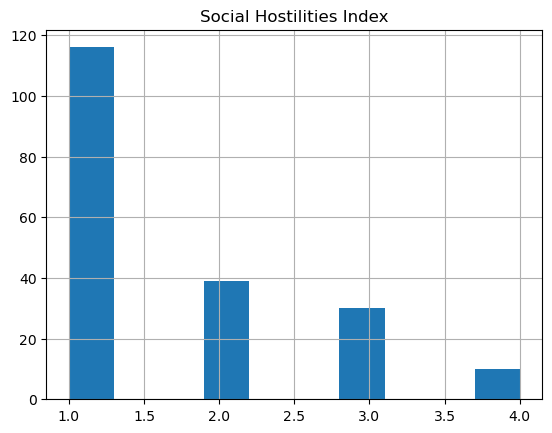

In [21]:
dataset.hist(column=["Social Hostilities Index"])

array([[<Axes: title={'center': 'government restriction index'}>]],
      dtype=object)

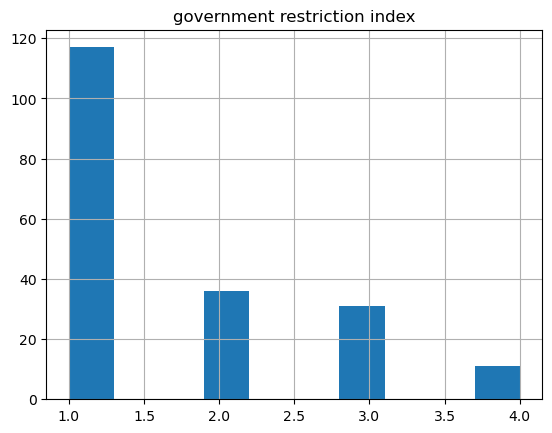

In [22]:
dataset.hist(column=["government restriction index"])

array([[<Axes: title={'center': 'Major Faith'}>]], dtype=object)

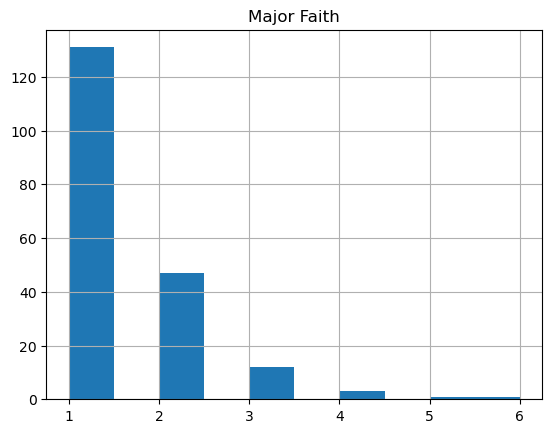

In [23]:
dataset.hist(column=["Major Faith"])

### Now Seeing the relationship between them all by plotting them!

##### Education Index and SHI

In [24]:
india_literacy_rate=74.4
india_education_index=.566
india_major_faith=4
india_hdi=.64
india_emp=45.589
india_ineq=35.7
india_gdp_pc=2389
india_corruption_i=40
india_press_fi=36.62
india_terror_i=7.175
india_govt_ri=3
india_shi=4

Text(0.566, 4, 'India')

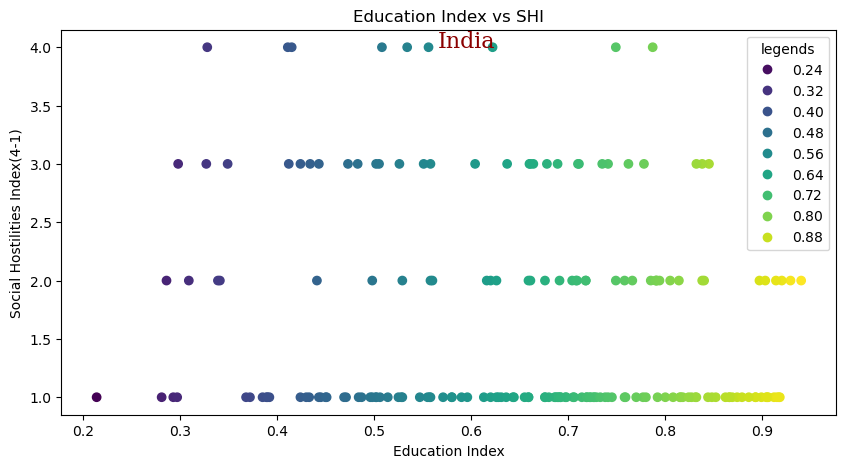

In [25]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["Education Index"],y=dataset["Social Hostilities Index"],c=dataset["Education Index"])
ax.set(xlabel="Education Index",ylabel="Social Hostilities Index(4-1)",title="Education Index vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_education_index,india_shi,"India", fontdict=font)

#### Literacy Rate vs SHI

Text(74.4, 4, 'India')

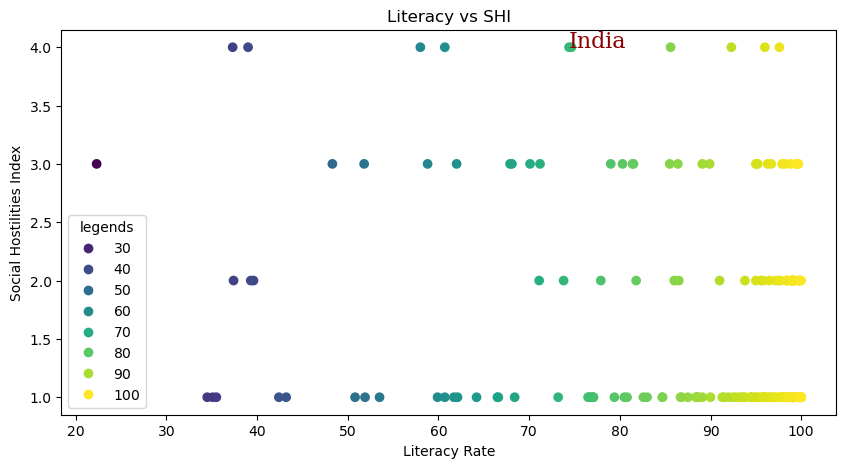

In [31]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["Literacy Rate"],y=dataset["Social Hostilities Index"],c=dataset["Literacy Rate"])
ax.legend(*abc.legend_elements(),title="legends")
ax.set(xlabel="Literacy Rate",ylabel="Social Hostilities Index",title="Literacy vs SHI")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_literacy_rate,india_shi,"India", fontdict=font)

#### Employment vs SHI

Text(45.589, 4, 'India')

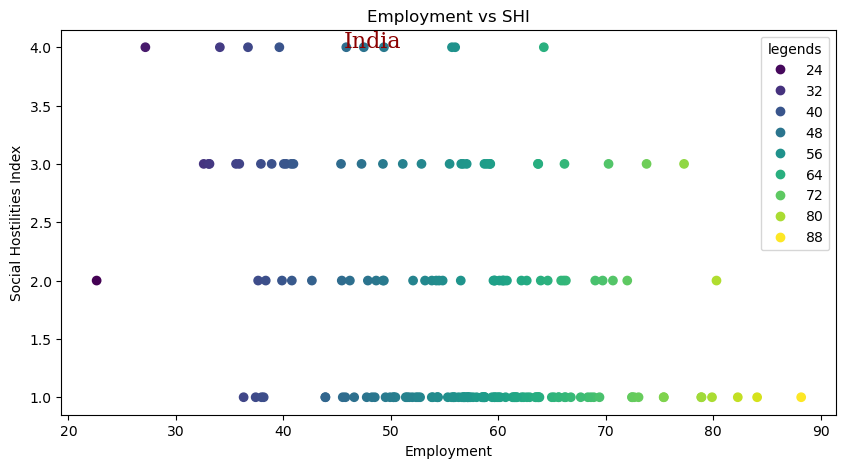

In [35]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["Employment"],y=dataset["Social Hostilities Index"],c=dataset["Employment"])
ax.set(xlabel="Employment",ylabel="Social Hostilities Index",title="Employment vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_emp,india_shi,"India", fontdict=font)

#### Inequality vs SHI

Text(35.7, 4, 'India')

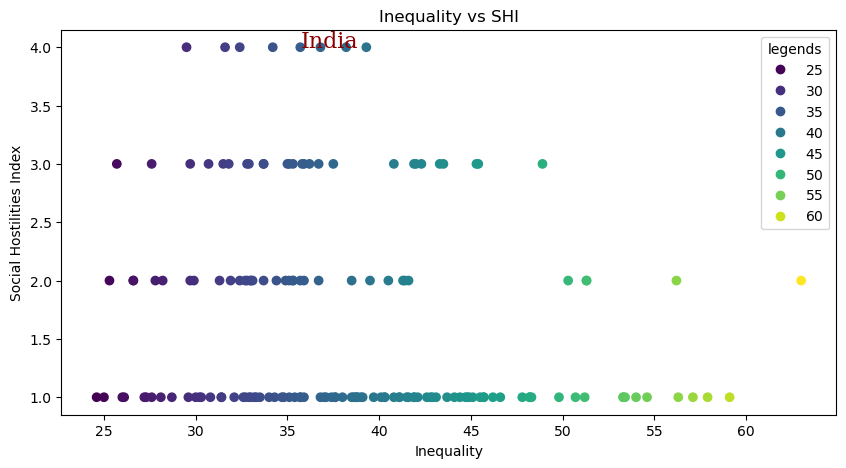

In [36]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["Inequality"],y=dataset["Social Hostilities Index"],c=dataset["Inequality"])
ax.set(xlabel="Inequality",ylabel="Social Hostilities Index",title="Inequality vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_ineq,india_shi,"India", fontdict=font)

#### GDP Per Capita(Nominal) vs SHI

Text(2389, 4, 'India')

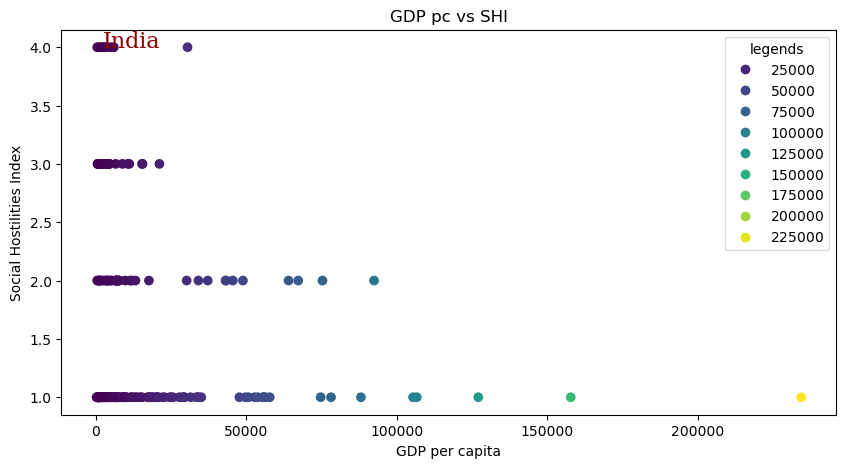

In [37]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["gdp(pc)"],y=dataset["Social Hostilities Index"],c=dataset["gdp(pc)"])
ax.set(xlabel="GDP per capita",ylabel="Social Hostilities Index",title="GDP pc vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_gdp_pc,india_shi,"India", fontdict=font)

### Corruption vs SHI

Text(40, 4, 'India')

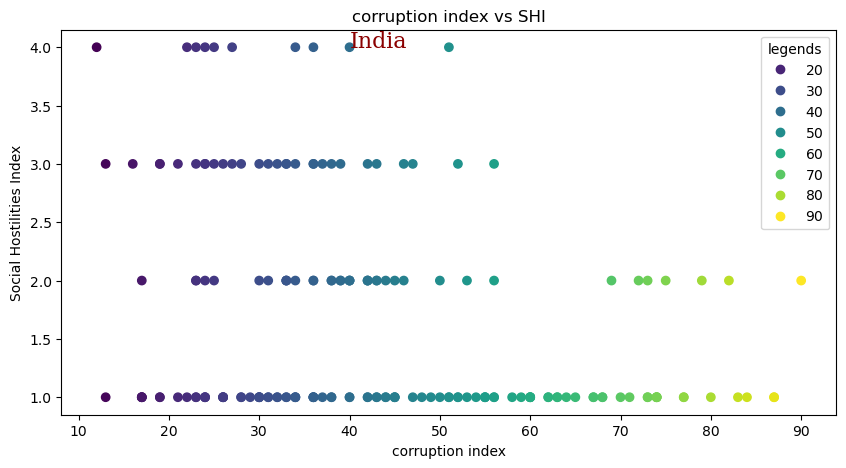

In [38]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["corruption index"],y=dataset["Social Hostilities Index"],c=dataset["corruption index"])
ax.set(xlabel="corruption index",ylabel="Social Hostilities Index",title="corruption index vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_corruption_i,india_shi,"India", fontdict=font)

#### Press freedom vs SHI

Text(36.62, 4, 'India')

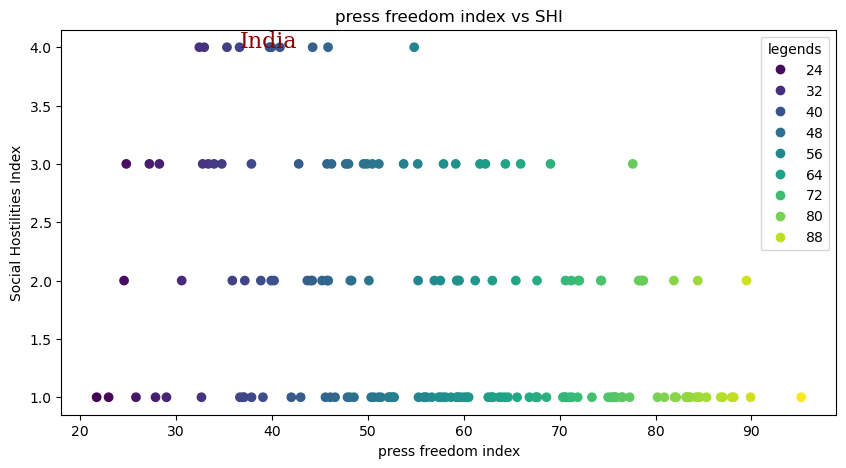

In [39]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["press freedom index"],y=dataset["Social Hostilities Index"],c=dataset["press freedom index"])
ax.set(xlabel="press freedom index",ylabel="Social Hostilities Index",title="press freedom index vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_press_fi,india_shi,"India", fontdict=font)

#### government restriction index vs SHI

Text(3, 4, 'India')

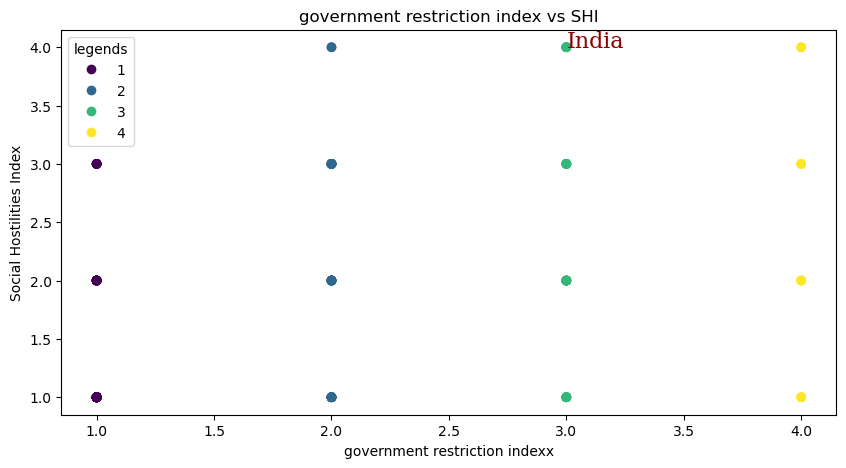

In [42]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["government restriction index"],y=dataset["Social Hostilities Index"],c=dataset["government restriction index"])
ax.set(xlabel="government restriction index",ylabel="Social Hostilities Index",title="government restriction index vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_govt_ri,india_shi,"India", fontdict=font)
# THis is not helping actually

In [46]:
num_gs=0
for i in range(1,5):
    for j in range(1,5):
        num_gs=dataset[(dataset["government restriction index"]==i) & (dataset["Social Hostilities Index"]==j)].shape[0]
        print(f"With gri as {i} and shi as {j} number of countries are:{num_gs}")
# How to plot this in 3d?

With gri as 1 and shi as 1 number of countries are:94
With gri as 1 and shi as 2 number of countries are:16
With gri as 1 and shi as 3 number of countries are:7
With gri as 1 and shi as 4 number of countries are:0
With gri as 2 and shi as 1 number of countries are:11
With gri as 2 and shi as 2 number of countries are:11
With gri as 2 and shi as 3 number of countries are:12
With gri as 2 and shi as 4 number of countries are:2
With gri as 3 and shi as 1 number of countries are:8
With gri as 3 and shi as 2 number of countries are:9
With gri as 3 and shi as 3 number of countries are:8
With gri as 3 and shi as 4 number of countries are:6
With gri as 4 and shi as 1 number of countries are:3
With gri as 4 and shi as 2 number of countries are:3
With gri as 4 and shi as 3 number of countries are:3
With gri as 4 and shi as 4 number of countries are:2


#### terrorism index vs SHI


Text(7.175, 4, 'India')

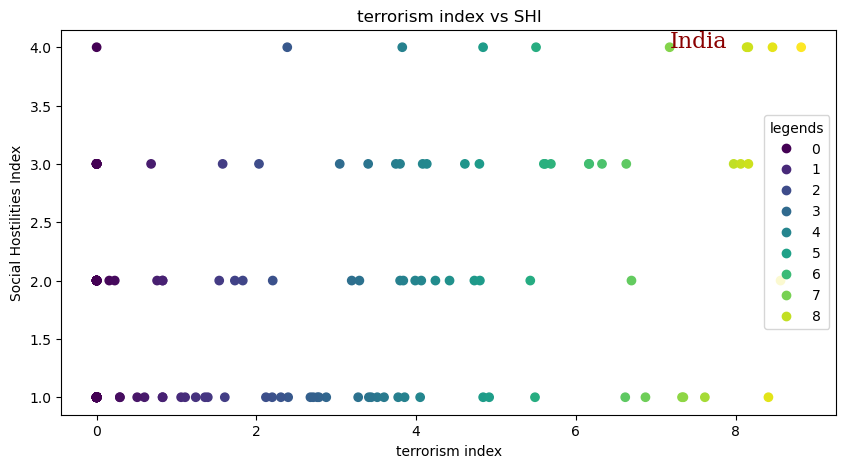

In [48]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["terrorism index"],y=dataset["Social Hostilities Index"],c=dataset["terrorism index"])
ax.set(xlabel="terrorism index",ylabel="Social Hostilities Index",title="terrorism index vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_terror_i,india_shi,"India", fontdict=font)

#### Major Faith vs SHI

Text(4, 4, 'India')

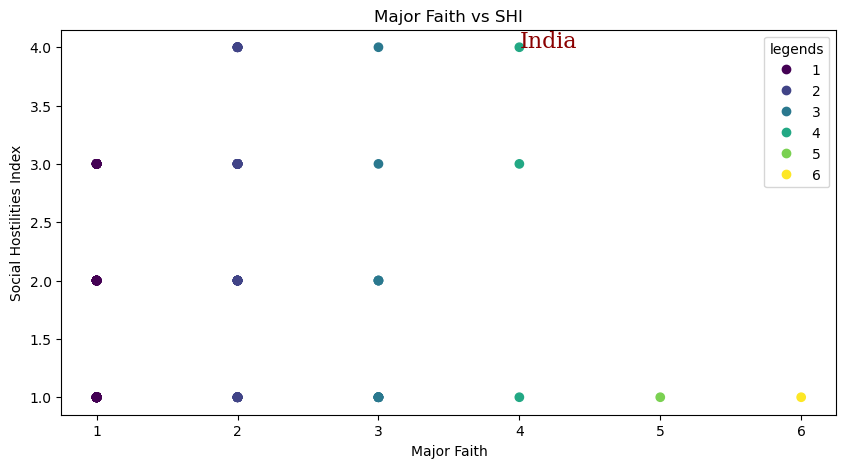

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["Major Faith"],y=dataset["Social Hostilities Index"],c=dataset["Major Faith"])
ax.set(xlabel="Major Faith",ylabel="Social Hostilities Index",title="Major Faith vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(4,india_shi,"India", fontdict=font)
## Doesn't help again and we need counts

In [53]:
num_gs=0
for i in range(1,7):
    for j in range(1,5):
        num_gs=dataset[(dataset["Major Faith"]==i) & (dataset["Social Hostilities Index"]==j)].shape[0]
        print(f"With Major Faith as {i} and shi as {j} number of countries are:{num_gs}")
        ## Again want to plot this but will it help?

With Major Faith as 1 and shi as 1 number of countries are:92
With Major Faith as 1 and shi as 2 number of countries are:23
With Major Faith as 1 and shi as 3 number of countries are:16
With Major Faith as 1 and shi as 4 number of countries are:0
With Major Faith as 2 and shi as 1 number of countries are:14
With Major Faith as 2 and shi as 2 number of countries are:13
With Major Faith as 2 and shi as 3 number of countries are:12
With Major Faith as 2 and shi as 4 number of countries are:8
With Major Faith as 3 and shi as 1 number of countries are:7
With Major Faith as 3 and shi as 2 number of countries are:3
With Major Faith as 3 and shi as 3 number of countries are:1
With Major Faith as 3 and shi as 4 number of countries are:1
With Major Faith as 4 and shi as 1 number of countries are:1
With Major Faith as 4 and shi as 2 number of countries are:0
With Major Faith as 4 and shi as 3 number of countries are:1
With Major Faith as 4 and shi as 4 number of countries are:1
With Major Faith a

#### HDI vs SHI

Text(0.64, 4, 'India')

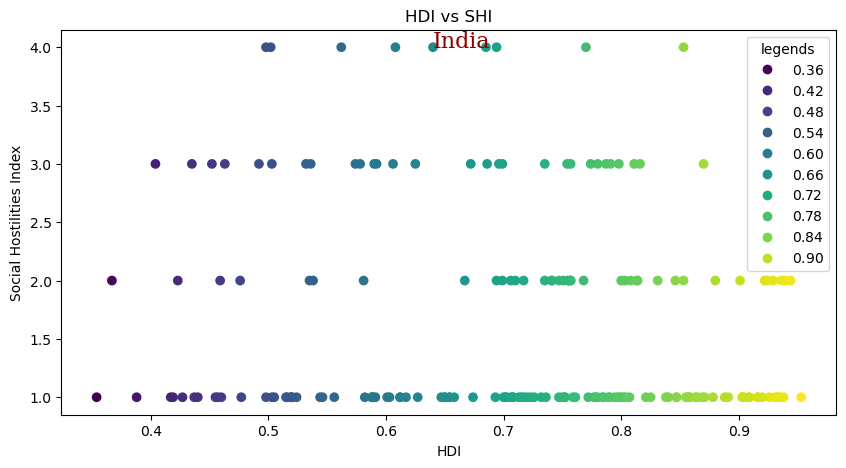

In [54]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=dataset["HDI"],y=dataset["Social Hostilities Index"],c=dataset["HDI"])
ax.set(xlabel="HDI",ylabel="Social Hostilities Index",title="HDI vs SHI")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_hdi,india_shi,"India", fontdict=font)

### Now the Correlation Matrix

In [58]:
dataset.corr(numeric_only=True) # Learn powerBI

,Literacy Rate,Education Index,Employment,Inequality,gdp(pc),corruption index,press freedom index,government restriction index,terrorism index,HDI,Major Faith,Social Hostilities Index
Literacy Rate,1.000000,0.827880,0.020362,-0.208914,0.347749,0.484292,0.213330,-0.023088,-0.348430,0.823653,-0.126229,-0.198271
Education Index,0.827880,1.000000,0.053075,-0.367642,0.599719,0.702681,0.473390,-0.066524,-0.223491,0.954860,-0.185554,-0.154857
Employment,0.020362,0.053075,1.000000,-0.003674,0.262221,0.241619,0.105556,-0.197400,-0.140490,0.035735,-0.093692,-0.349616
Inequality,-0.208914,-0.367642,-0.003674,1.000000,-0.356723,-0.331633,-0.131799,-0.261957,-0.053246,-0.391484,-0.202058,-0.196416
gdp(pc),0.347749,0.599719,0.262221,-0.356723,1.000000,0.762033,0.484984,-0.072032,-0.105321,0.557826,-0.097452,-0.199681
corruption index,0.484292,0.702681,0.241619,-0.331633,0.762033,1.000000,0.670790,-0.248481,-0.217033,0.728619,-0.136393,-0.316066
press freedom index,0.213330,0.473390,0.105556,-0.131799,0.484984,0.670790,1.000000,-0.589134,-0.282939,0.414702,-0.440635,-0.382154
government restriction index,-0.023088,-0.066524,-0.197400,-0.261957,-0.072032,-0.248481,-0.589134,1.000000,0.281698,0.005888,0.423134,0.510129
terrorism index,-0.348430,-0.223491,-0.140490,-0.053246,-0.105321,-0.217033,-0.282939,0.281698,1.000000,-0.215823,0.207602,0.470893
HDI,0.823653,0.954860,0.035735,-0.391484,0.557826,0.728619,0.414702,0.005888,-0.215823,1.000000,-0.095454,-0.135692


### now doing PCA

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaling=StandardScaler()
df_new1=dataset.drop(["Country"],axis=1)
df_new=df_new1.dropna()
scaling.fit(df_new)
scaled_data=scaling.transform(df_new)
pca =PCA(n_components=2)
pca.fit(scaled_data)
x=pca.transform(scaled_data)
x.shape

(140, 2)

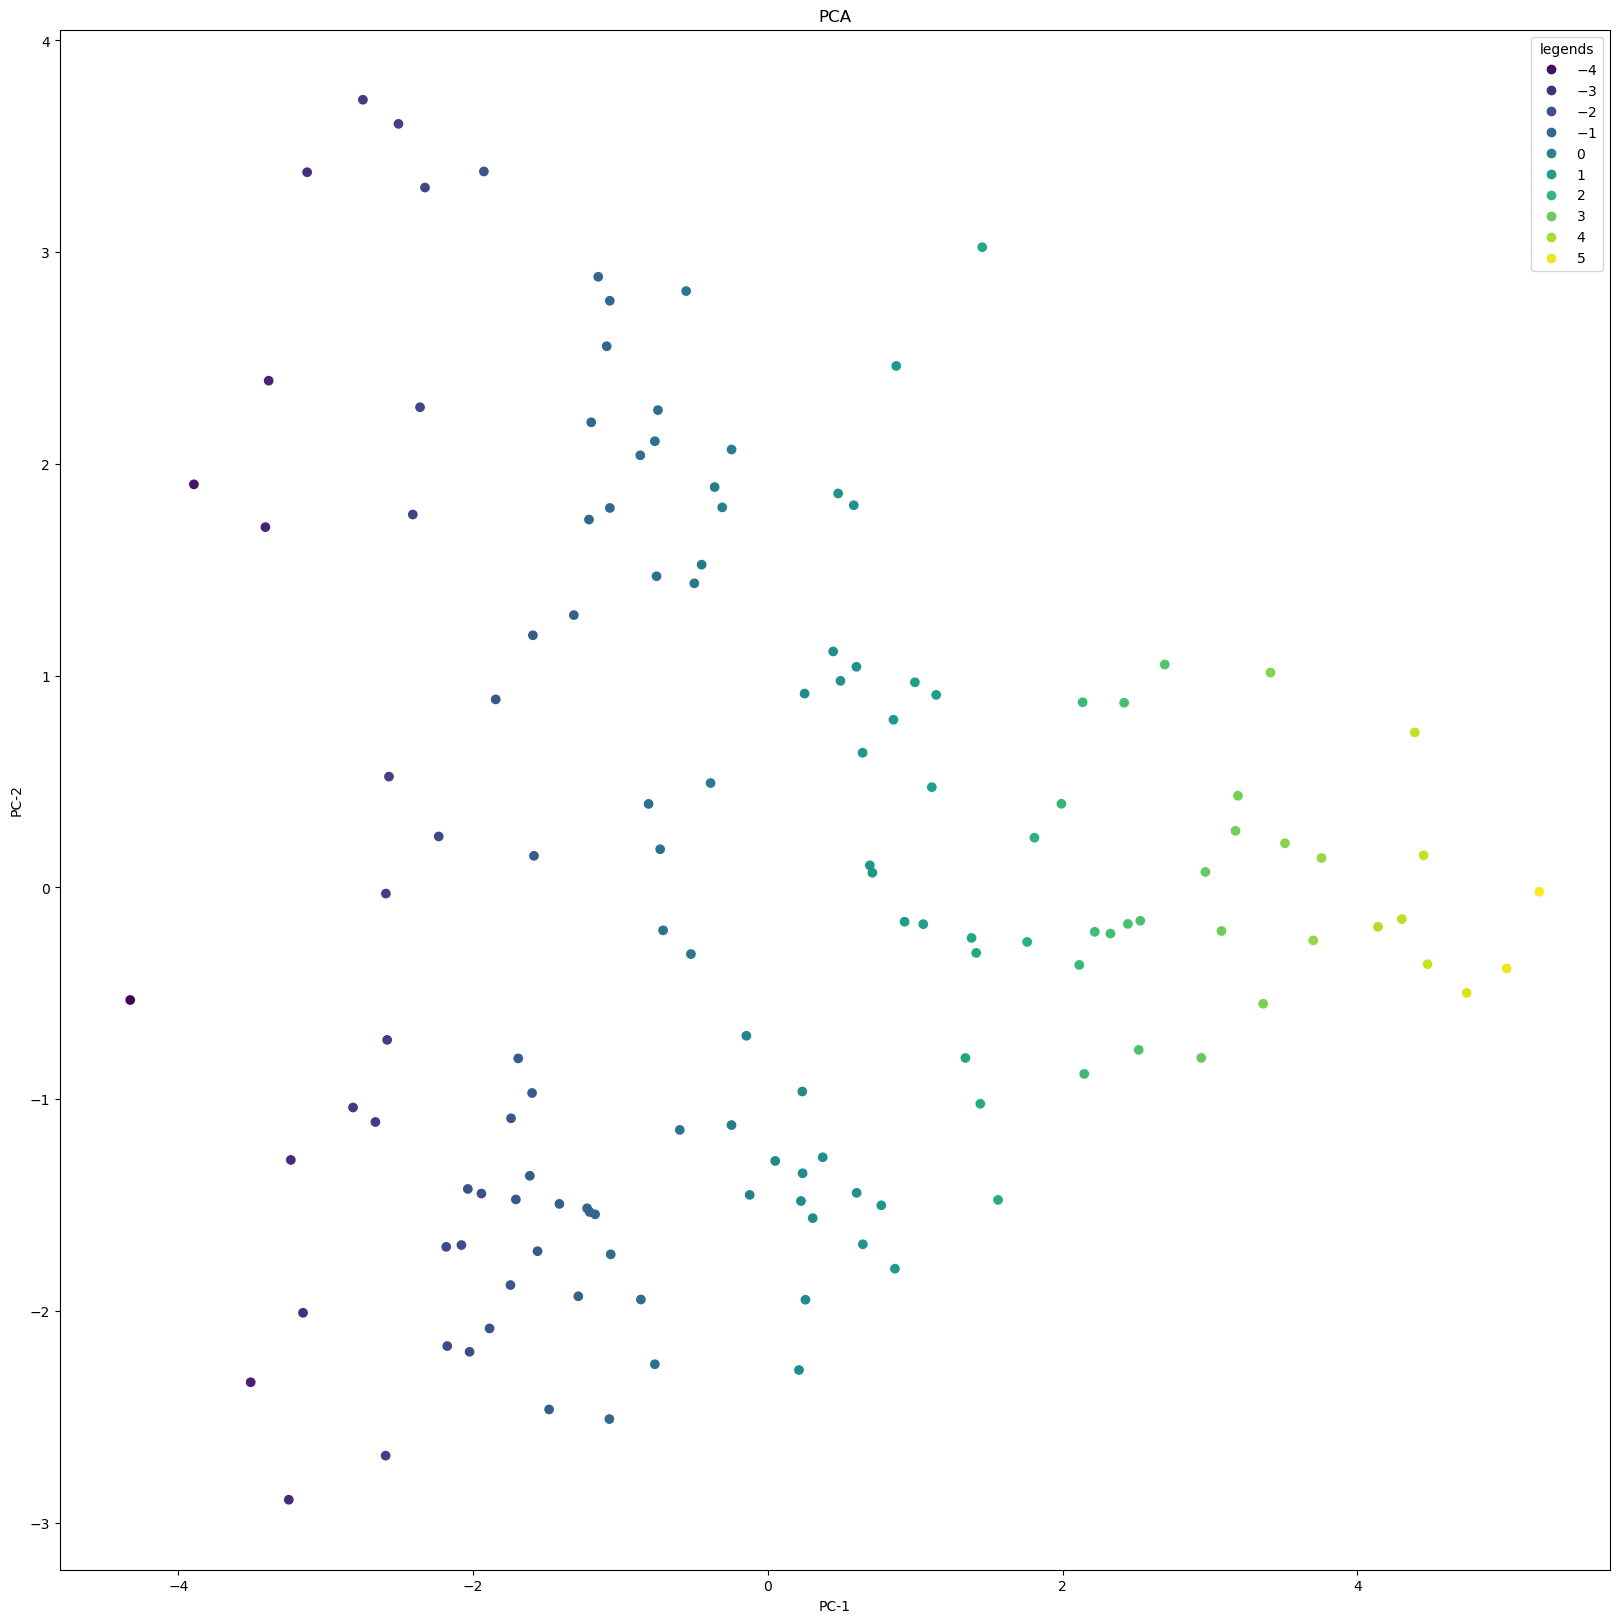

In [73]:
fig,ax=plt.subplots(figsize=(20,20))
abc=ax.scatter(x=x[:,0],y=x[:,1], c=x[:,0])
ax.set(xlabel="PC-1",ylabel="PC-2",title="PCA")
ax.legend(*abc.legend_elements(),title="legends")

In [101]:
from sklearn.cluster import KMeans
NUMBER_OF_CLUSTER=4

kmeans=KMeans(n_clusters=NUMBER_OF_CLUSTER)
df_f1=dataset.drop(["Country"],axis=1)
df_f=df_f1.dropna()
label=kmeans.fit_predict(x)

C:\Users\Arian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


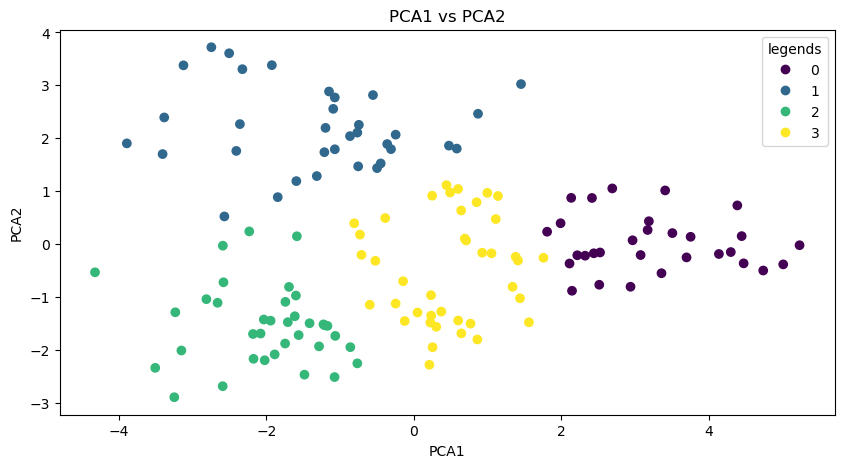

In [102]:
fig,ax=plt.subplots(figsize=(10,5))
abc=ax.scatter(x=x[:,0],y=x[:,1],c=label)
ax.set(xlabel="PCA1",ylabel="PCA2",title="PCA1 vs PCA2")
ax.legend(*abc.legend_elements(),title="legends")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
#ax.text(india_hdi,india_shi,"India", fontdict=font)

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df_f.drop(["Social Hostilities Index"],axis=1)
y = df_f["Social Hostilities Index"]

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [120]:
model = LogisticRegression(solver='liblinear', random_state=0)
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
y_pred=model1.predict(x_test)
print(y_pred)

[1 3 1 1 1 1 1 1 1 1 4 1 1 1 3 4 1 2 1 3 1 1 1 1 2 1 1 3 3 1 3 1 1 3 2]


In [122]:
from sklearn import metrics

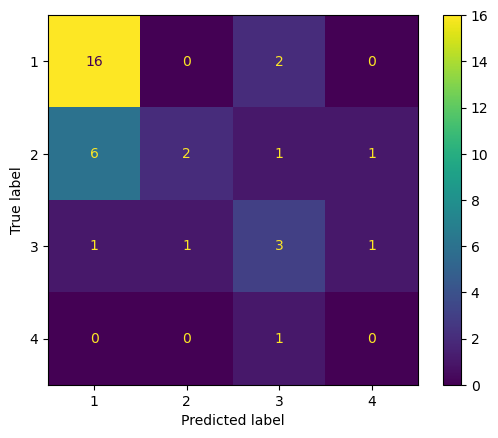

In [125]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3,4])
cm_display.plot()
plt.show()